<a href="https://colab.research.google.com/github/SOLEROM/tinyai/blob/main/AI00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABOUT

# Model

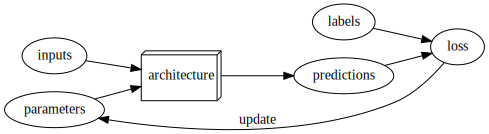

In [3]:
#hide_input
#caption Detailed training loop
#id detailed_loop
from fastbook import *

gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

# Jargon 


* Label | The data that we're trying to predict, such as "dog" or "cat"
* Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
* Model | The combination of the architecture with a particular set of parameters
* Parameters | The values in the model that change what task it can do, and are updated through model training
* Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
* Train | A synonym for _fit_
* Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
* Fine-tune | Update a pretrained model for a different task
* Epoch | One complete pass through the input data
* Loss | A measure of how good the model is, chosen to drive training via SGD
* Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
* Validation set | A set of data held out from training, used only for measuring how good the model is
* Training set | The data used for fitting the model; does not include any data from the validation set
* Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
* CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks


# What Image Recognizer Learn

At this stage we have an image recognizer that is working very well, but we have no idea what it is actually doing! Although many people complain that deep learning results in impenetrable "black box" models (that is, something that gives predictions but that no one can understand), this really couldn't be further from the truth. There is a vast body of research showing how to deeply inspect deep learning models, and get rich insights from them. Having said that, all kinds of machine learning models (including deep learning, and traditional statistical models) can be challenging to fully understand, especially when considering how they will behave when coming across data that is very different to the data used to train them. We'll be discussing this issue throughout this book.

In 2013 a PhD student, Matt Zeiler, and his supervisor, Rob Fergus, published the paper ["Visualizing and Understanding Convolutional Networks"](https://arxiv.org/pdf/1311.2901.pdf), which showed how to visualize the neural network weights learned in each layer of a model. They carefully analyzed the model that won the 2012 ImageNet competition, and used this analysis to greatly improve the model, such that they were able to go on to win the 2013 competition! <<img_layer1>> is the picture that they published of the first layer's weights.

<img src="https://github.com/fastai/fastbook/blob/master/images/layer1.png?raw=1" alt="Activations of the first layer of a CNN" width="300" caption="Activations of the first layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer1">

This picture requires some explanation. For each layer, the image part with the light gray background shows the reconstructed weights pictures, and the larger section at the bottom shows the parts of the training images that most strongly matched each set of weights. For layer 1, what we can see is that the model has discovered weights that represent diagonal, horizontal, and vertical edges, as well as various different gradients. (Note that for each layer only a subset of the features are shown; in practice there are thousands across all of the layers.) These are the basic building blocks that the model has learned for computer vision. They have been widely analyzed by neuroscientists and computer vision researchers, and it turns out that these learned building blocks are very similar to the basic visual machinery in the human eye, as well as the handcrafted computer vision features that were developed prior to the days of deep learning. The next layer is represented in <<img_layer2>>.

<img src="https://github.com/fastai/fastbook/blob/master/images/layer2.png?raw=1" alt="Activations of the second layer of a CNN" width="800" caption="Activations of the second layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer2">

For layer 2, there are nine examples of weight reconstructions for each of the features found by the model. We can see that the model has learned to create feature detectors that look for corners, repeating lines, circles, and other simple patterns. These are built from the basic building blocks developed in the first layer. For each of these, the right-hand side of the picture shows small patches from actual images which these features most closely match. For instance, the particular pattern in row 2, column 1 matches the gradients and textures associated with sunsets.

<<img_layer3>> shows the image from the paper showing the results of reconstructing the features of layer 3.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter2_layer3.PNG?raw=1" alt="Activations of the third layer of a CNN" width="800" caption="Activations of the third layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer3">

As you can see by looking at the righthand side of this picture, the features are now able to identify and match with higher-level semantic components, such as car wheels, text, and flower petals. Using these components, layers four and five can identify even higher-level concepts, as shown in <<img_layer4>>.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter2_layer4and5.PNG?raw=1" alt="Activations of layers 4 and 5 of a CNN" width="800" caption="Activations of layers 4 and 5 of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer4">

This article was studying an older model called *AlexNet* that only contained five layers. Networks developed since then can have hundreds of layers—so you can imagine how rich the features developed by these models can be! 

When we fine-tuned our pretrained model earlier, we adapted what those last layers focus on (flowers, humans, animals) to specialize on the cats versus dogs problem. More generally, we could specialize such a pretrained model on many different tasks. Let's have a look at some examples. 

## Data sets

 In machine learning and deep learning, we can’t do anything without data

often start by using one of the cut-down versions and later scale up to the full-size version (just as we're doing in this chapter!). In fact, this is how the world’s top practitioners do their modeling in practice; they do most of their experimentation and prototyping with subsets of their data, and only use the full dataset when they have a good understanding of what they have to do.

### validaion set


 split our dataset into two sets: the training set (which our model sees in training) and the validation set, also known as the development set (which is used only for evaluation). This lets us test that the model learns lessons from the training data that generalize to new data, the validation data

### test set

 we must hold back the test set data even from ourselves. It cannot be used to improve the model; it can only be used to evaluate the model at the very end of our efforts.